In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00017-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00022-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00023-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [4]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-7972e656-4015-4887-a274-7bea21c07a1a-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,581.33,54.00,66.30,54.796404,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.01,0.04,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,644.60,57.88,131.60,67.959230,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026776,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
8026777,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
8026778,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
8026779,0.098774,89.59,38.72,64.00,53573.359053,53573.359053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.00,0.03,0.72,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4936.10,377.54,503.09,473.096393,35.773402,475.24,8.366362e+07,9.5,29.727165,50.159886,4912.823316,0.38,141.55,Mirai-greip_flood


In [5]:
df['label'].value_counts()

DDoS-ICMP_Flood            1238333
DDoS-UDP_Flood              931652
DDoS-TCP_Flood              773881
DDoS-PSHACK_Flood           703932
DDoS-SYN_Flood              698545
DDoS-RSTFINFlood            694516
DDoS-SynonymousIP_Flood     617059
DoS-UDP_Flood               570383
DoS-TCP_Flood               459303
DoS-SYN_Flood               347666
BenignTraffic               189171
Mirai-greeth_flood          170053
Mirai-udpplain              153299
Mirai-greip_flood           129817
DDoS-ICMP_Fragmentation      77610
MITM-ArpSpoofing             52996
DDoS-UDP_Fragmentation       49743
DDoS-ACK_Fragmentation       49211
DNS_Spoofing                 30978
Recon-HostDiscovery          22990
Recon-OSScan                 16883
Recon-PortScan               14128
DoS-HTTP_Flood               12375
VulnerabilityScan             6417
DDoS-HTTP_Flood               4969
DDoS-SlowLoris                4078
DictionaryBruteForce          2204
BrowserHijacking               986
SqlInjection        

In [6]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

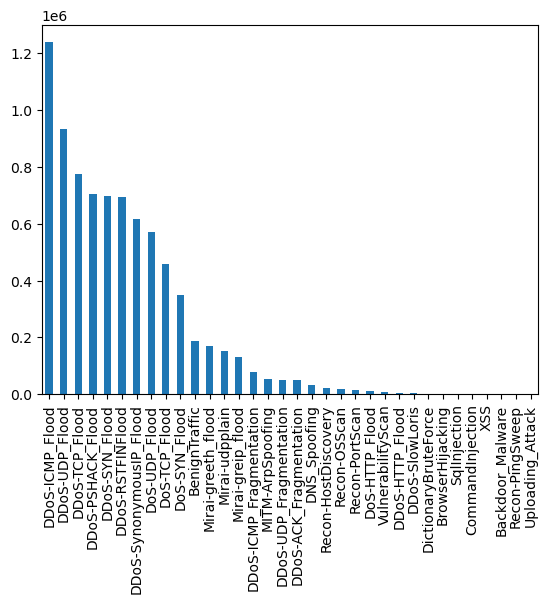

In [7]:
bar_graph('label')

In [8]:
df=df[df["label"].str.contains("DoS-TCP_Flood|DoS-SYN_Flood|BenignTraffic|Mirai-greeth_flood|Mirai-udpplain|Mirai-greip_flood|DDoS-ICMP_Fragmentation|MITM-ArpSpoofing|DDoS-ACK_Fragmentation|DDoS-UDP_Fragmentation|DNS_Spoofing|Recon-HostDiscovery|Recon-OSScanRecon-PortScan|DoS-HTTP_Flood|VulnerabilityScan|DDoS-HTTP_Flood|DDoS-SlowLoris|DictionaryBruteForce|SqlInjection|BrowserHijacking|CommandInjection|Backdoor_Malware|XSS|Uploading_Attack|Recon-PingSweep") == False]
df=df.reset_index(drop=True)
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.0,42.0,42.00,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
3,1.052463,108.00,6.00,64.00,1.902353,1.902353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.336548e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1885.4,156.4,180.72,177.394893,7.624944,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786881,0.067170,28185.00,17.00,64.00,10696.138358,10696.138358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.312361e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4786882,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.0,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
4786883,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4786884,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [9]:
df['label'].unique()

array(['DDoS-RSTFINFlood', 'DDoS-ICMP_Flood', 'DoS-UDP_Flood',
       'DDoS-SynonymousIP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-UDP_Flood',
       'Recon-PortScan', 'Recon-OSScan'], dtype=object)

In [10]:


df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.0,42.0,42.00,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
3,1.052463,108.00,6.00,64.00,1.902353,1.902353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.336548e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1885.4,156.4,180.72,177.394893,7.624944,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786881,0.067170,28185.00,17.00,64.00,10696.138358,10696.138358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.312361e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4786882,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.0,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
4786883,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
4786884,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [11]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,2
1,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.0,42.0,42.00,42.000000,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
2,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,5
3,1.052463,108.00,6.00,64.00,1.902353,1.902353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.336548e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,3
4,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1885.4,156.4,180.72,177.394893,7.624944,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786881,0.067170,28185.00,17.00,64.00,10696.138358,10696.138358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.312361e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4
4786882,8.488524,108.00,6.00,64.00,0.235612,0.235612,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.0,2.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.00,54.000000,0.000000,54.00,8.333179e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
4786883,0.096340,29945.00,17.00,64.00,105133.557023,105133.557023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.310616e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4
4786884,0.243185,35207.00,17.00,64.00,8905.367703,8905.367703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.00,50.000000,0.000000,50.00,8.309875e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4


In [12]:
x=df.drop(columns=['label'])
y=df['label']

In [13]:
y

0          2
1          0
2          5
3          3
4          5
          ..
4786881    4
4786882    1
4786883    4
4786884    4
4786885    2
Name: label, Length: 4786886, dtype: int32

In [14]:
Y = to_categorical(y)
Y

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(3829508, 46)
(3829508, 8)
(957378, 46)
(957378, 8)


In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [22]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [39]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(LSTM(50,  input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50,return_sequences=True))

model.add(Flatten())
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
plot_model(model, 'rnn.png', show_shapes=True)



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 46, 50)            10400     
                                                                 
 lstm_23 (LSTM)              (None, 46, 50)            20200     
                                                                 
 flatten_8 (Flatten)         (None, 2300)              0         
                                                                 
 dense_12 (Dense)            (None, 8)                 18408     
                                                                 
Total params: 49,008
Trainable params: 49,008
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
#callbacks: checkpoint, csv_logger
filepath="lstm.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('lstm_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

# training the model on training dataset
history = model.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/20
47869/47869 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9809
Epoch 1: val_accuracy improved from -inf to 0.99601, saving model to lstm.hdf5
47869/47869 [==============================] - 1933s 40ms/step - loss: 0.0436 - accuracy: 0.9809 - val_loss: 0.0087 - val_accuracy: 0.9960
Epoch 2/20
47869/47869 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9962
Epoch 2: val_accuracy improved from 0.99601 to 0.99705, saving model to lstm.hdf5
47869/47869 [==============================] - 1852s 39ms/step - loss: 0.0082 - accuracy: 0.9962 - val_loss: 0.0059 - val_accuracy: 0.9970
Epoch 3/20
47868/47869 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9967
Epoch 3: val_accuracy improved from 0.99705 to 0.99728, saving model to lstm.hdf5
47869/47869 [==============================] - 1820s 38ms/step - loss: 0.0067 - accuracy: 0.9967 - val_loss: 0.0055 - val_accuracy: 0.9973
Epoch 4/20
47868/47869 [================

Text(0, 0.5, 'accuracy')

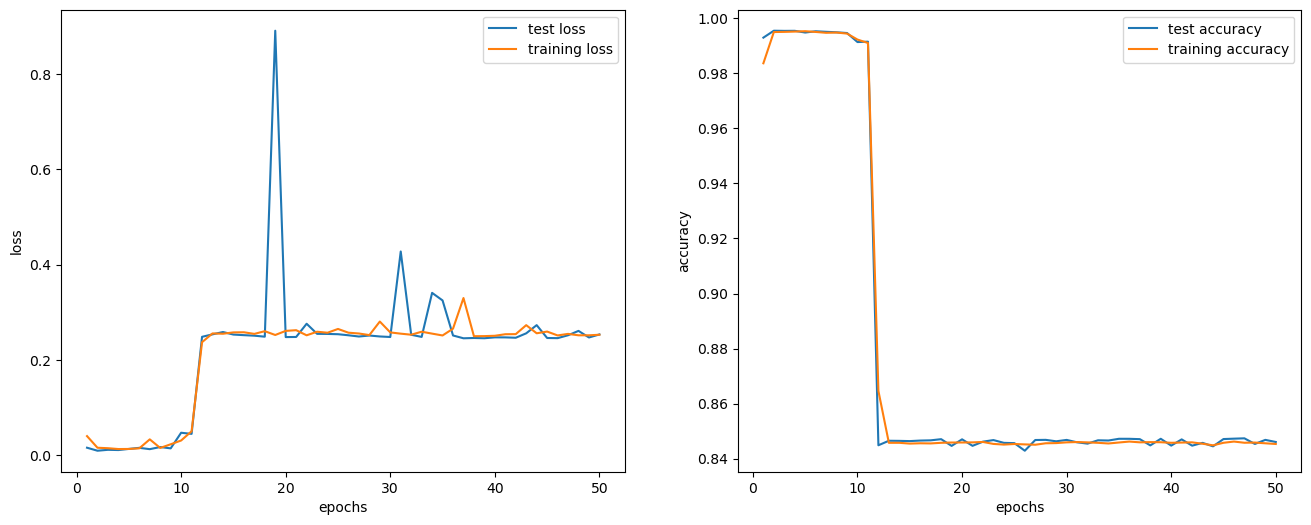

In [31]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,51,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,51,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,51,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,51,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

29919/29919 [==============================] - 22s 746us/step
Precision score:  0.9952258188485107
Recall score:  0.9952505697853931
F1 score:  0.9949843694455646


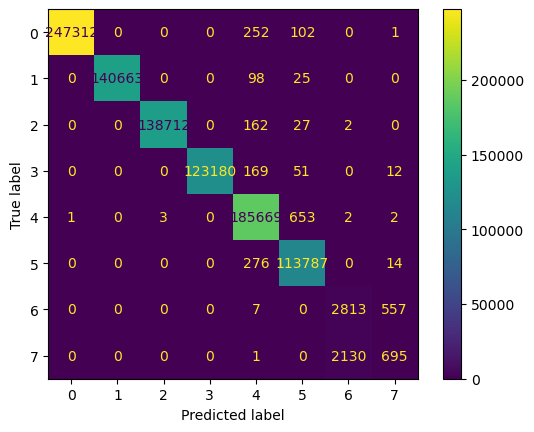

In [32]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test1, dnn_pred)